In [1]:
import sys
import os

repo_root = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
sys.path.append(repo_root)

print(repo_root)

/home/jackyeung99/classes/class_financial-econometrics


In [2]:
import matplotlib.pyplot as plt
import math 
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from statsmodels.tsa.stattools import adfuller, coint
from Models.ARIMA import ARIMA_model

In [3]:
plt.style.use("../styler.mplstyle") 

In [4]:
data = ['CPIAUCSL', 'GDPC1', 'CNP16OV', 'FEDFUNDS']

In [5]:
df = pdr.DataReader(
    data,
    "fred",
    start="1980-01-01",
    end="2025-07-01"
).astype(float).reset_index()

In [ ]:
df['INF'] = 400 * np.log(df['CPIAUCSL']/ df['CPIAUCSL'].shift(-1))
df['INF_demeaned'] = df['INF'] - df['INF'].mean()

Text(0, 0.5, '$\\Delta$ INF')

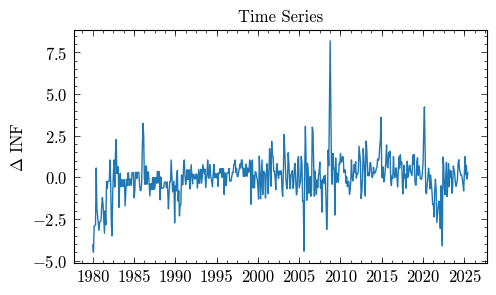

In [7]:
plt.plot(df['DATE'], df['INF_demeaned'])
plt.title("Time Series")
# plt.xlabel("Time")
plt.ylabel("$\Delta$ INF")


In [8]:
p_vals = [0, 1, 2, 3]
q_vals = [0, 1, 2, 3]

In [9]:
models = []

In [10]:
df['INF_demeaned']

0     -4.056597
1     -4.492188
2     -2.936175
3     -2.897058
4     -2.858704
         ...   
542    0.156424
543    0.715718
544   -0.107263
545    0.253471
546         NaN
Name: INF_demeaned, Length: 547, dtype: float64

In [ ]:
model = ARIMA_model(df['INF_demeaned'], (2,0,1))
coef = model.AR()
print(coef)

[ 0.57682515 -0.07783559]


In [12]:
for p in p_vals:  
    for q in q_vals:

        if p == q and p == 0:
            continue
        

        model = ARIMA(df['INF_demeaned'], order=(p, 0, 1))
        model_fit = model.fit()

        print(model.param_names)
        print(model_fit.summary())
        models.append((model, p, q,))\
        
        break 
    break

        

NameError: name 'ARIMA' is not defined

In [ ]:
for model, p, q in models:
    aic()
